In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('./data/train.csv')
data_exam = pd.read_csv('./data/test.csv')

### Функции очистки данных

In [4]:
def drop_healthcare(ds):
    return ds.drop(columns=['Healthcare_1'], axis=1)

In [5]:
def drop_kitchen(ds):
    return ds.drop(columns=['KitchenSquare'], axis=1)

In [6]:
def clear_houseyear(ds):
    rows_to_clear = ds.loc[(ds.HouseYear < 1900) | (ds.HouseYear > 2020)]
    df_valid = ds.loc[(ds.HouseYear >= 1900) | (ds.HouseYear <= 2020)]
    max_year = df_valid.HouseYear.max()
    min_year = df_valid.HouseYear.min()

    for index, row in rows_to_clear.iterrows():
        sqr_delta = row.Square / row.Rooms
        year = ds.loc[(df_valid.Id != row.Id) & 
                        (df_valid.DistrictId == row.DistrictId) & 
                        (df_valid.Rooms == row.Rooms) & 
                        (df_valid.Square <= row.Square + sqr_delta) & (df_valid.Square >= row.Square - sqr_delta)
                       ].HouseYear.mean()

        ds.loc[index, 'HouseYear'] = np.clip(np.int64(year), min_year, max_year)
    
    return ds

### Очистка, разбиение на сеты

In [7]:
data = drop_healthcare(data)
data = drop_kitchen(data)
data = clear_houseyear(data)

data_exam = drop_healthcare(data_exam)
data_exam = drop_kitchen(data_exam)
data_exam = clear_houseyear(data_exam)

In [8]:
data.Rooms.describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

### Очистка руками

#### Rooms

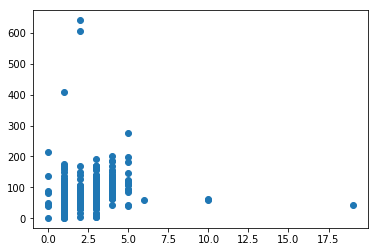

In [9]:
plt_ = plt.scatter(data.Rooms, data.Square)

In [10]:
data.loc[data.Rooms > 5]

Id  DistrictId  Rooms     Square  LifeSquare  Floor  HouseFloor  \
377    5927          57   10.0  59.056975   36.223072     22        22.0   
1454   8491           1   19.0  42.006046   21.779288     17        17.0   
2170  14003          99    6.0  59.414334   38.702244      7         9.0   
8849  14865           9   10.0  60.871266   38.420681      3         2.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
377        2002   0.090799         B         B        74     19083         2   
1454       2014   0.007122         B         B         1       264         0   
2170       1969   0.033494         B         B        66     10573         1   
8849       1994   0.161532         B         B        25      5648         1   

      Helthcare_2  Shops_1 Shops_2          Price  
377             5       15       B  317265.323792  
1454            0        1       B   78364.616704  
2170            3        8       B  229661.964416  
8849            2        4       B  172329.270863

In [11]:
data.loc[data.Rooms == 0]

Id  DistrictId  Rooms      Square  LifeSquare  Floor  HouseFloor  \
1397  12638          27    0.0  138.427694  136.215499      4         3.0   
1981   7917          27    0.0  212.932361  211.231125      2         3.0   
2269   7317          27    0.0   41.790881         NaN     13         0.0   
3911    770          28    0.0   49.483501         NaN     16         0.0   
4366    456           6    0.0   81.491446         NaN      4         0.0   
4853   3224          27    0.0    2.377248    0.873147      1         0.0   
6149   3159          88    0.0   38.697117   19.345131      9        16.0   
8834   9443          27    0.0   87.762616   85.125471      5        15.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
1397       2016   0.075424         B         B        11      3097         0   
1981       2008   0.211401         B         B         9      1892         0   
2269       1977   0.211401         B         B         9      1892         0   
3911       2015   0.118537         B         B        30      6207         1   
4366       1977   0.243205         B         B         5      1564         0   
4853       1977   0.017647         B         B         2       469         0   
6149       1982   0.127376         B         B        43      8429         3   
8834       1977   0.211401         B         B         9      1892         0   

      Helthcare_2  Shops_1 Shops_2          Price  
1397            0        0       B  268394.744389  
1981            0        1       B  302211.260887  
2269            0        1       B   98129.976788  
3911            1        0       B  217009.338463  
4366            0        0       B  212864.799112  
4853            0        0       B  126596.941798  
6149            3        9       B  158998.110646  
8834            0        1       B  219281.918007

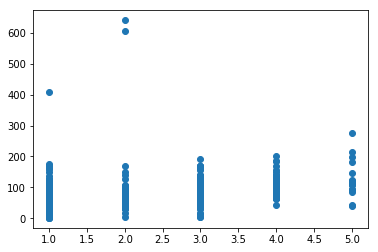

In [12]:
data.loc[377, 'Rooms'] = 2
data.loc[1454, 'Rooms'] = 1
data.loc[2170, 'Rooms'] = 2
data.loc[8849, 'Rooms'] = 2

data.loc[1397, 'Rooms'] = 4
data.loc[1981, 'Rooms'] = 5
data.loc[2269, 'Rooms'] = 1
data.loc[3911, 'Rooms'] = 2
data.loc[4366, 'Rooms'] = 3
data.loc[4853, 'Rooms'] = 1
data.loc[6149, 'Rooms'] = 1
data.loc[4853, 'Rooms'] = 1
data.loc[8834, 'Rooms'] = 3

plt_ = plt.scatter(data.Rooms, data.Square)

-

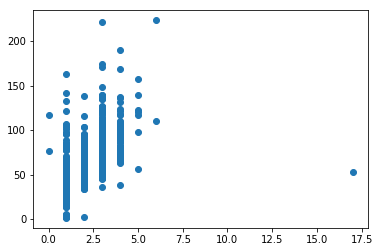

In [13]:
plt_ = plt.scatter(data_exam.Rooms, data_exam.Square)

In [14]:
data_exam.loc[data_exam.Rooms > 10]

Id  DistrictId  Rooms     Square  LifeSquare  Floor  HouseFloor  \
3398  1435         111   17.0  52.866107   32.528342     15        17.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
3398       1987   0.093443         B         B        23      4635         5   

      Helthcare_2  Shops_1 Shops_2  
3398            2        4       B

In [15]:
data_exam.loc[data_exam.Rooms == 0]

Id  DistrictId  Rooms      Square  LifeSquare  Floor  HouseFloor  \
2406   3343          58    0.0  116.824201  113.692424      3         3.0   
2524  10729          27    0.0   76.345154   42.820796     14         0.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
2406       1977   0.437885         B         B        23      5735         3   
2524       1977   0.017647         B         B         2       469         0   

      Helthcare_2  Shops_1 Shops_2  
2406            0        5       B  
2524            0        0       B

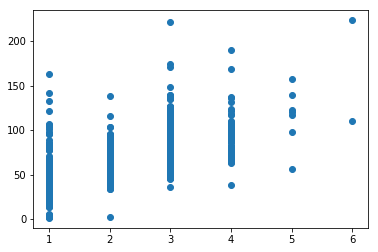

In [16]:
data_exam.loc[3398, 'Rooms'] = 1
data_exam.loc[2406, 'Rooms'] = 3
data_exam.loc[2524, 'Rooms'] = 2
plt_ = plt.scatter(data_exam.Rooms, data_exam.Square)

#### Square

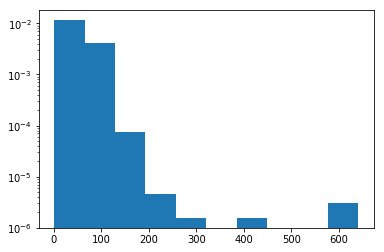

In [17]:
plt_ = plt.hist(data.Square, bins=10, density=True, log='y')

In [18]:
data[data.Square > 350]

Id  DistrictId  Rooms      Square  LifeSquare  Floor  HouseFloor  \
4262     28           9    2.0  604.705972         NaN     17        18.0   
4690   2307         102    1.0  409.425181  410.639749      4         4.0   
6977  11602          30    2.0  641.065193  638.163193     20        19.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
4262       1977   0.161532         B         B        25      5648         1   
4690       2016   0.238617         B         B        26      3889         6   
6977       2019   0.000078         B         B        22      6398       141   

      Helthcare_2  Shops_1 Shops_2          Price  
4262            2        4       B  187717.242538  
4690            3        6       B   90470.430830  
6977            3       23       B  133529.681562

In [19]:
data[data.Square <= 16]

Id  DistrictId  Rooms     Square  LifeSquare  Floor  HouseFloor  \
212    1748          88    2.0   5.497061   67.628717     24        22.0   
1316  11526          27    1.0   4.633498    1.969969     18         1.0   
1608  10202           6    1.0   2.596351    4.604943      3        25.0   
3280  10527          27    1.0   4.380726   40.805837     10        17.0   
3413   9487           5    1.0   5.129222    5.549458      1         1.0   
4739  12676          81    3.0  13.784865   15.988889      4         5.0   
4853   3224          27    1.0   2.377248    0.873147      1         0.0   
4900   4504          27    3.0   4.390331    5.610772      8        19.0   
6392  14786           1    1.0   1.136859    4.525736      3         1.0   
8030  13265           1    3.0   4.823679   79.767964      6        17.0   
8283  15744          34    1.0   1.988943    2.642219     21         4.0   
9294   6782          45    1.0   2.954309    5.257278      3         1.0   
9613   7657          38    1.0   4.502784    4.618547     28         1.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
212        1977   0.127376         B         B        43      8429         3   
1316       1977   0.011654         B         B         4       915         0   
1608       2014   0.243205         B         B         5      1564         0   
3280       2013   0.211401         B         B         9      1892         0   
3413       1977   0.150818         B         B        16      3433         4   
4739       1960   0.319809         B         B        25      4756        16   
4853       1977   0.017647         B         B         2       469         0   
4900       2016   0.211401         B         B         9      1892         0   
6392       1977   0.007122         B         B         1       264         0   
8030       1977   0.007122         B         B         1       264         0   
8283       1977   0.069753         B         B        53     13670         4   
9294       1977   0.195781         B         B        23      5212         6   
9613       1977   0.060753         B         B        15      2787         2   

      Helthcare_2  Shops_1 Shops_2          Price  
212             3        9       B  412511.088764  
1316            0        0       B  107604.269441  
1608            0        0       B  137597.601458  
3280            0        1       B   97560.720383  
3413            4        5       B  369472.403061  
4739            5        8       B   78388.806186  
4853            0        0       B  126596.941798  
4900            0        1       B  161379.067034  
6392            0        1       B  181434.825589  
8030            0        1       B  237716.681261  
8283            1       11       B  458378.777006  
9294            3        2       B  438005.182323  
9613            0        7       B  483283.488083

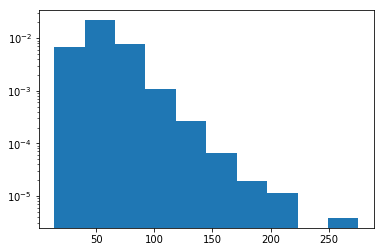

In [20]:
data.loc[4262, 'Square'] = 60.4
data.loc[4690, 'Square'] = 40.9
data.loc[6977, 'Square'] = 64.1

data.loc[212, 'Square'] = 67.6
data.loc[212, 'LifeSquare'] = 54.9

data.loc[1316, 'Square'] = 46.3
data.loc[1316, 'LifeSquare'] = 46.3 - 19.6

data.loc[1608, 'Square'] = 46
data.loc[1608, 'LifeSquare'] = 26

data.loc[3280, 'Square'] = 44
data.loc[3280, 'LifeSquare'] = 41

data.loc[3413, 'Square'] = 55.4
data.loc[3413, 'LifeSquare'] = 51

data.loc[4739, 'Rooms'] = 1

data.loc[4853, 'Square'] = 23.7
data.loc[4853, 'LifeSquare'] = 16

data.loc[4900, 'Square'] = 56
data.loc[4900, 'LifeSquare'] = 43

data.loc[6392, 'Square'] = 45
data.loc[6392, 'LifeSquare'] = 32

data.loc[8030, 'Square'] = 80
data.loc[8030, 'LifeSquare'] = 48

data.loc[8283, 'Square'] = 26.5
data.loc[8283, 'LifeSquare'] = 20

data.loc[9294, 'Square'] = 52.5
data.loc[9294, 'LifeSquare'] = 29

data.loc[9613, 'Square'] = 46
data.loc[9613, 'LifeSquare'] = 45


plt_ = plt.hist(data.Square, bins=10, density=True, log='y')

In [21]:
data.LifeSquare.fillna(0.01, inplace=True)

In [22]:
data[data.LifeSquare > 1000]

Id  DistrictId  Rooms     Square   LifeSquare  Floor  HouseFloor  \
4328  16550          27    3.0  81.694417  7480.592129      9        17.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
4328       2016   0.017647         B         B         2       469         0   

      Helthcare_2  Shops_1 Shops_2          Price  
4328            0        0       B  217357.492366

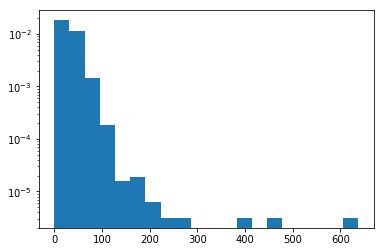

In [23]:
data.loc[4328, 'LifeSquare'] = 74.8
plt_ = plt.hist(data.LifeSquare, bins=20, density=True, log='y')

In [24]:
data[data.LifeSquare > 300]

Id  DistrictId  Rooms     Square  LifeSquare  Floor  HouseFloor  \
4690   2307         102    1.0  40.900000  410.639749      4         4.0   
6977  11602          30    2.0  64.100000  638.163193     20        19.0   
8437  15886          85    3.0  78.059331  461.463614     12        16.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
4690       2016   0.238617         B         B        26      3889         6   
6977       2019   0.000078         B         B        22      6398       141   
8437       1998   0.037178         B         B        52     11217         1   

      Helthcare_2  Shops_1 Shops_2          Price  
4690            3        6       B   90470.430830  
6977            3       23       B  133529.681562  
8437            1        7       B  394253.299978

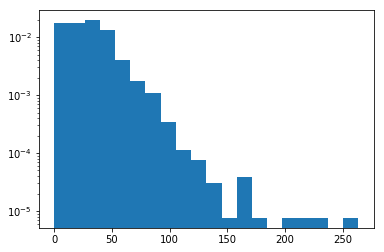

In [28]:
data.loc[4690, 'LifeSquare'] = 41
data.loc[6977, 'LifeSquare'] = 64
data.loc[8437, 'LifeSquare'] = 46

plt_ = plt.hist(data.LifeSquare, bins=20, density=True, log='y')

-

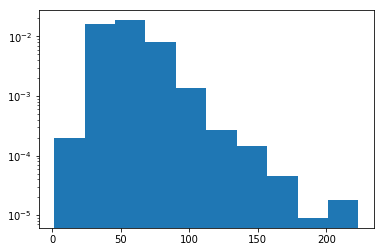

In [26]:
plt_ = plt.hist(data_exam.Square, bins=10, density=True, log='y')

In [27]:
data_exam[data_exam.Square <= 16]

Id  DistrictId  Rooms     Square  LifeSquare  Floor  HouseFloor  \
2      5480         190    1.0  13.597819   15.948246      2         5.0   
66     9011          53    1.0   1.378543    1.353573      1         1.0   
608   16401          30    1.0   2.645046    4.338755      2         1.0   
837    2138          27    1.0   5.647458    1.501582      1         1.0   
1165  10120           6    1.0   5.100672    3.861780      3         1.0   
3697  15435          21    1.0  13.305531    9.495367      6         5.0   
4490   1165          27    1.0   2.372101    1.899119      2        17.0   
4540   7855           6    1.0   4.967143    2.968086      3         1.0   
4713    170           6    2.0   2.900586   61.468563     18        17.0   
4902   1420          45    1.0   1.975769    2.900371      1         1.0   

      HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
2          1909   0.000000         B         B        30      7538        87   
66         1977   0.049637         B         B        34      7759         0   
608        1977   0.000078         B         B        22      6398       141   
837        1977   0.017647         B         B         2       469         0   
1165       1977   0.243205         B         B         5      1564         0   
3697       1965   0.194489         B         B        47      8004         3   
4490       1977   0.011654         B         B         4       915         0   
4540       2018   0.243205         B         B         5      1564         0   
4713       2014   0.243205         B         B         5      1564         0   
4902       1977   0.195781         B         B        23      5212         6   

      Helthcare_2  Shops_1 Shops_2  
2               5        5       B  
66              1        3       B  
608             3       23       B  
837             0        0       B  
1165            0        0       B  
3697            3        5       B  
4490            0        0       B  
4540            0        0       B  
4713            0        0       B  
4902            3        2       B